# Plot Garud H statistics 

In [ ]:
#!pip install malariagen_data
#!pip install scikit-allel
#!pip install petl

In [ ]:
#import malariagen_data
#import allel
import numpy as np
import pandas as pd
import functools
#from dask.diagnostics.progress import ProgressBar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [ ]:
#Mounting Google Drive
import os
import glob
from google.colab import drive
drive.mount("drive")

# make dir 
results_dir = "drive/MyDrive/"
os.makedirs(results_dir, exist_ok=True)

Mounted at drive


In [ ]:
# import data 
df = pd.DataFrame()
files = glob.glob('drive/MyDrive/Fru_paper/Fru_analysis_tabs/garud_stat_*.csv')
for f in files:
  csv_files = pd.read_csv(f)
  df = df.append(csv_files)

In [ ]:
garud_stat = df.reset_index()[['pos', 'pops', 'H1', 'H12', 'H123', 'H1_2']]
garud_stat

In [ ]:
west_stat = pd.read_csv('drive/MyDrive/Fru_paper/Fru_analysis_tabs/garud_stat_west.csv')
east_stat = pd.read_csv('drive/MyDrive/Fru_paper/Fru_analysis_tabs/garud_stat_east.csv')
central_stat = pd.read_csv('drive/MyDrive/Fru_paper/Fru_analysis_tabs/garud_stat_central.csv')

In [ ]:
# Plotting garud h
# Compute the figure of sequence divergence 
def fig_garud_h(x, y, title=None,  ax=None, ylab=None, xlab=None, annot=None, 
                color = 'red', s = 5, fig_name=None):
  #define ax 
  if ax is None:
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.despine(ax=ax, offset=5)

  # make plot 
  ax.scatter(x, y, s=s, c=color)
  # Plot title
  if title:
    ax.set_title(f'{title}')
  
  # Customize plot 
  if ylab:
    ax.set_ylabel('H12')
  if xlab:
    ax.set_xlabel('Chrom X (bp)')
  
  #annotations
  if annot:
    ax.axvspan(1283016, 1373662, color='magenta', alpha=0.1, lw=0.3)
    ax.annotate('$fru$ region', xy=(1373662, 0.3), xytext=(1800000, 0.3), color='darkred',
                arrowprops=dict(arrowstyle="->", color='crimson'))
  
  #ax setting 
  ax.set_ylim(0,1)
  xlim=(list(x)[0], list(x)[-1])
  ax.set_xlim(*xlim)
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()]) 
  if fig_name:
    fig.savefig(f"drive/MyDrive/Fru_paper/Fru_graph/garud_{fig_name}.png", dpi=300, bbox_inches='tight')

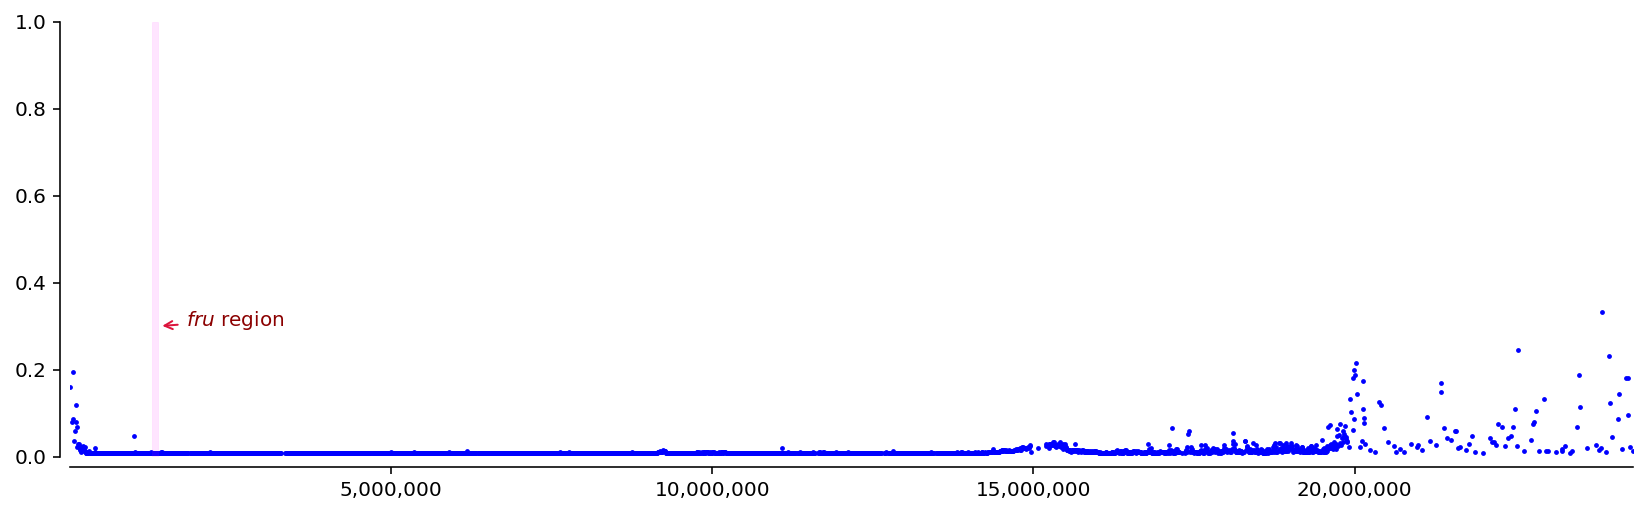

In [ ]:
mali = garud_stat[garud_stat['pops']=='MLI (An. gambiae)']
fig_garud_h(x=mali.pos, y=mali.H1, annot=True, s=2, color='blue')

In [ ]:
#pop_colors
h_colors, label_h, key_list = {}, {}, list(garud_stat.pops.unique())
colored = sns.color_palette("husl", len(key_list))
for i in range(len(key_list)):
    h_colors[key_list[i]] = colored[i]
    label_h[key_list[i]] = key_list[i]

In [ ]:
def plot_garud_h1(data=garud_stat, annot=None, ax=None, s=3):
  if ax is None:
    fig, ax = plt.subplots(figsize=(14,4))
    sns.despine(ax=ax, offset=5)

  #Plot fst
  f_list = list(data.pops.unique())
  for idx in f_list:
    df = data[data['pops']==f'{idx}']
    fig_garud_h(x=df.pos, y=df.H1, ax=ax, s=s, color=h_colors[idx])

  # add annotations 
  if annot:
    ax.axvspan(1283016, 1373662, color='magenta', alpha=0.2, lw=0.2)
    ax.annotate('$fru$ region', xy=(1373662, 0.2), xytext=(1800000, 0.2), color='crimson',
            arrowprops=dict(arrowstyle="->", color='darkred'))
  
  #legend
  handles = [mpl.patches.Patch(color=h_colors[pop], label=label_h[pop]) for pop in f_list]
  ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0.68, 0.5, 0.5, 0.5), ncol=1, labelspacing=0.8)


In [ ]:
plot_garud_h1(data = garud_stat, annot=True, ax=None, s=0.5)

In [ ]:
plot_garud_h1(data = west_stat, annot=True, ax=None, s=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

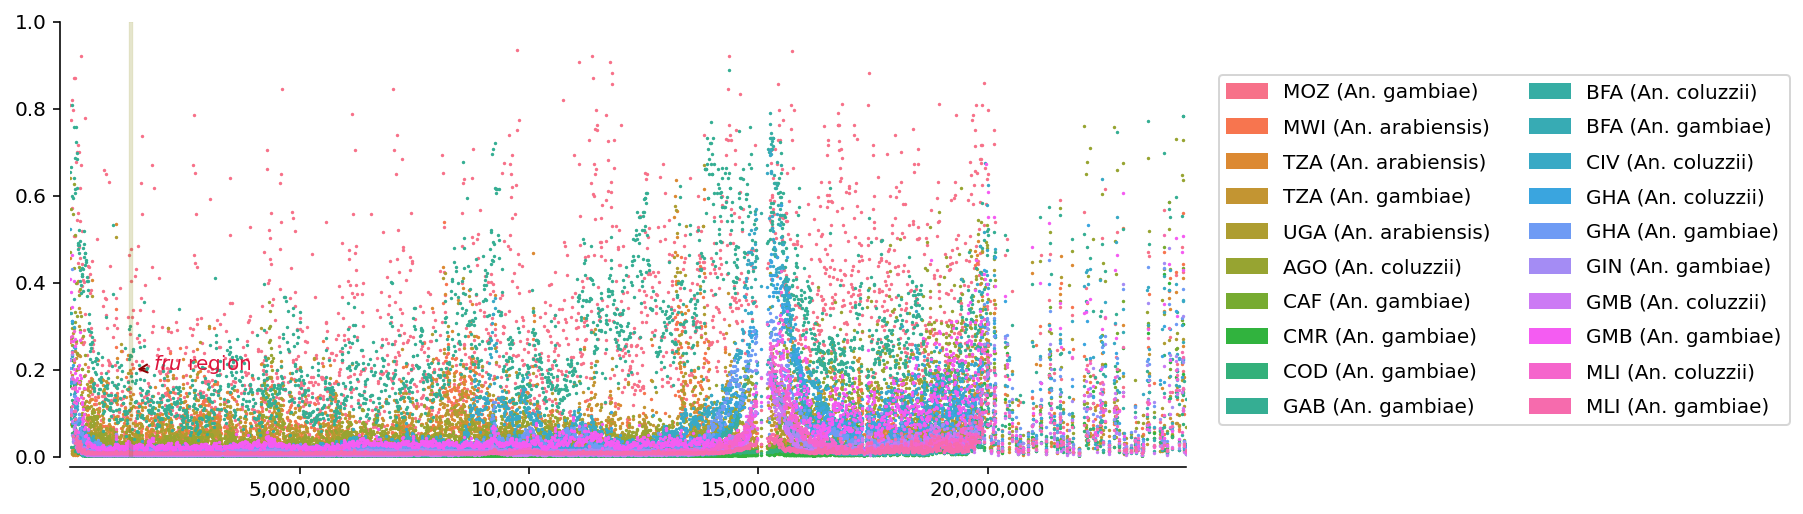

In [ ]:
def plot_garud_h12(data=garud_stat, annot=None, ax=None, ylab=None, xlab=None, 
                   loc=[0.2, 0.2], s=3, legend_col=2):
  if ax is None:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.despine(ax=ax, offset=5)

  #Plot fst
  f_list = list(data.pops.unique())
  for idx in f_list:
    df = data[data['pops']==f'{idx}']
    fig_garud_h(x=df.pos, y=df.H12, ax=ax, ylab=ylab, xlab=xlab, s=s, color=h_colors[idx])

  # add annotations 
  if annot:
    ax.axvspan(1283016, 1373662, color='olive', alpha=0.2, lw=0.2)
    ax.annotate('$fru$ region', xy=(1373662, loc[0]), xytext=(1800000, loc[1]), color='crimson',
            arrowprops=dict(arrowstyle="->", color='darkred'))
  
  #legend
  handles = [mpl.patches.Patch(color=h_colors[pop], label=label_h[pop]) for pop in f_list]
  ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(1.02, 0.05), ncol=legend_col, labelspacing=0.8)

plot_garud_h12(data = garud_stat, annot=True, ax=None, s=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

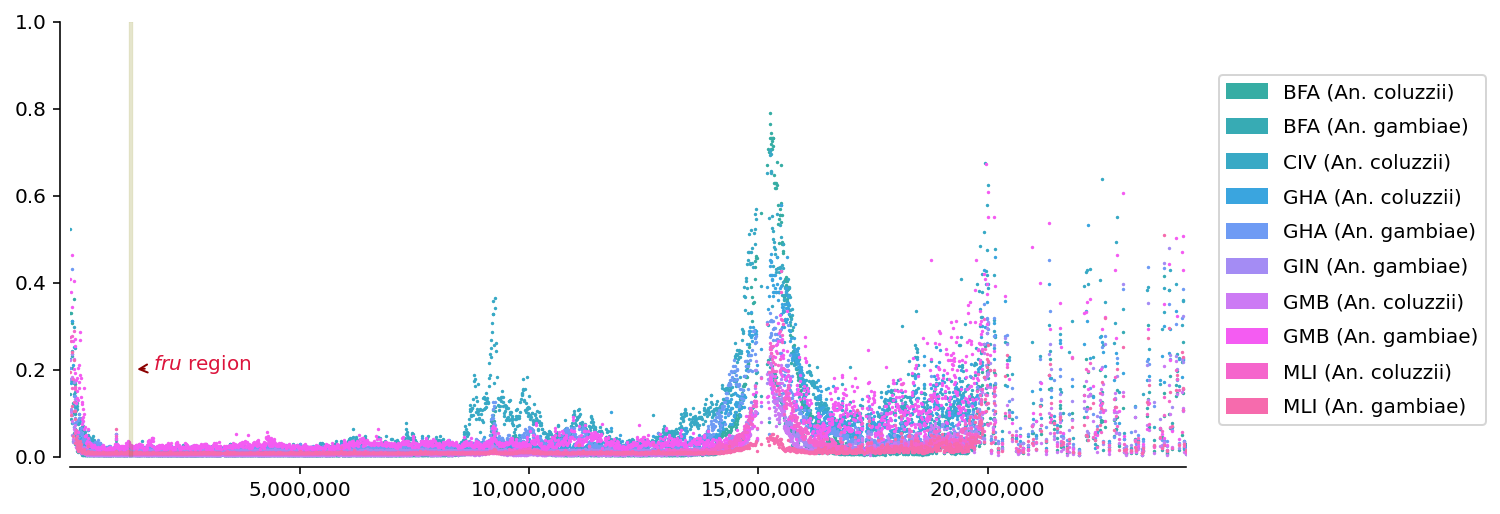

In [ ]:
plot_garud_h12(data = west_stat, annot=True, ax=None, s=0.5, legend_col=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

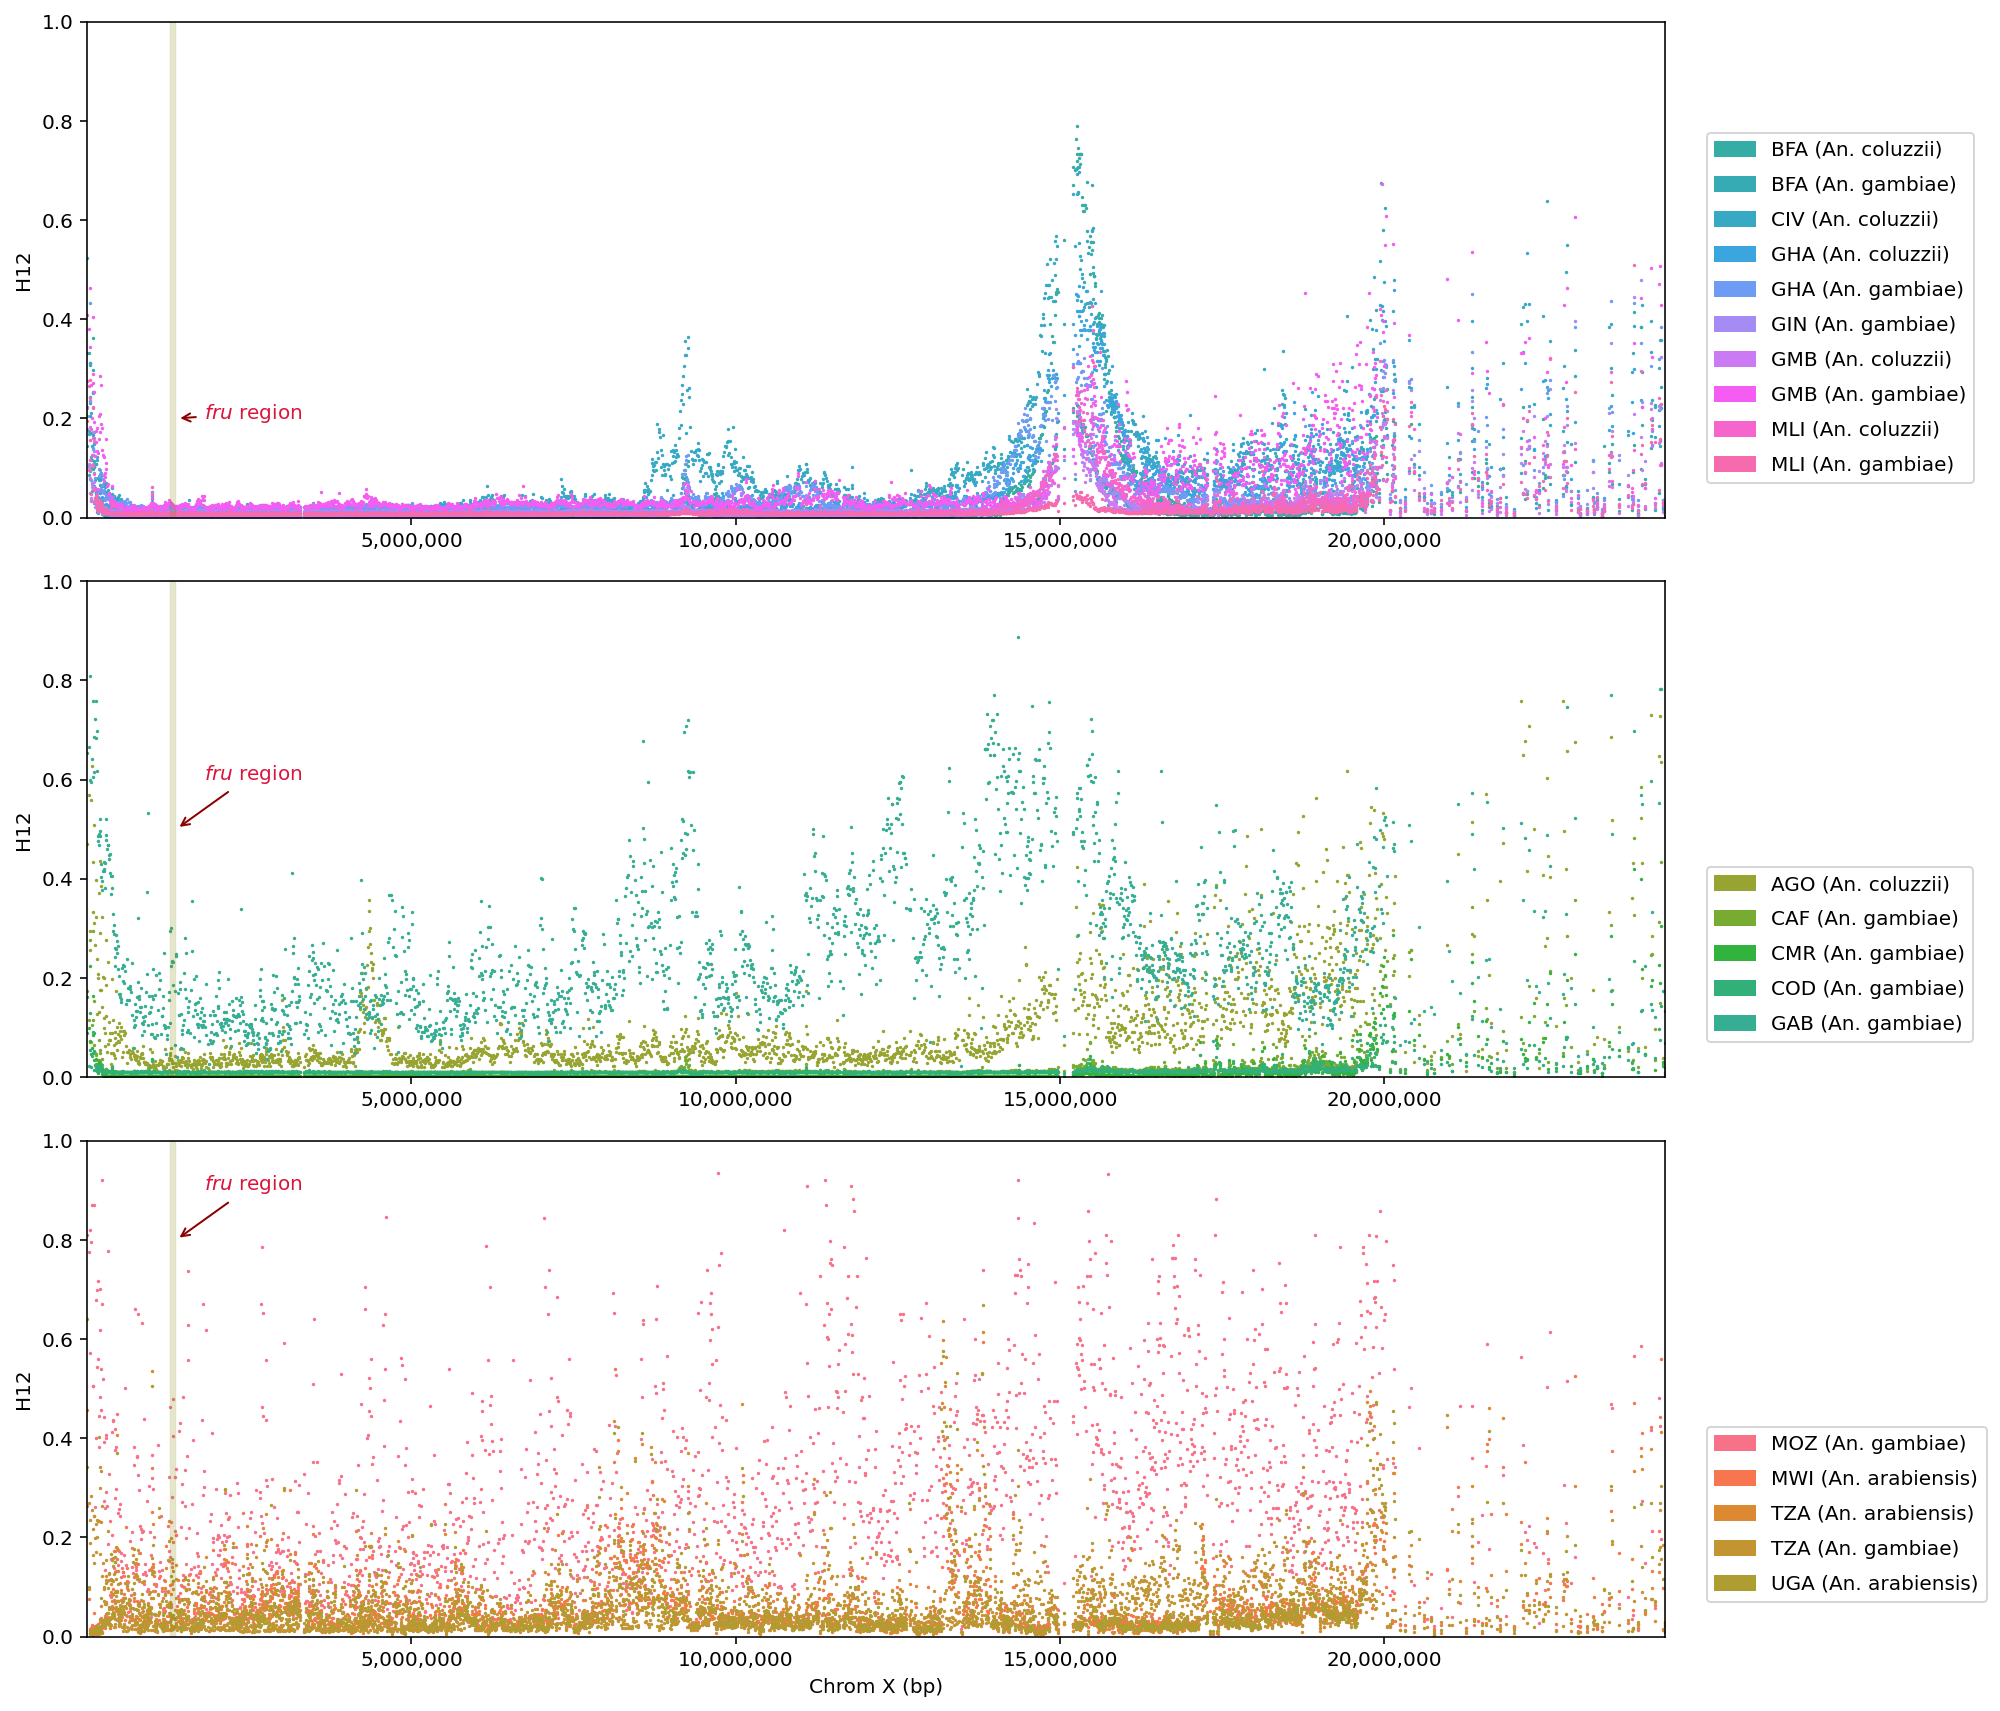

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
gs = GridSpec(3, 1, figure=fig)

ax0 = plt.subplot(gs[0, 0])
plot_garud_h12(data = west_stat, annot=True, ax=ax0, ylab=True, s=0.5, legend_col=1)

ax1 = plt.subplot(gs[1, 0])
plot_garud_h12(data = central_stat, annot=True, ax=ax1, ylab=True, loc=[0.5, 0.6], 
               s=0.5, legend_col=1)

ax2 = plt.subplot(gs[2, 0])
plot_garud_h12(data = east_stat, annot=True, ax=ax2, ylab=True, xlab=True, 
               loc=[0.8, 0.9], s=0.5, legend_col=1)

fig.tight_layout()
fig.savefig("drive/MyDrive/Fru_paper/Fru_graph/garud_h12.png", dpi=300, bbox_inches='tight')